## Pandas (Working with Time Series)

Pandas se desarrolló en el contexto de modelado financiero, por lo que comprenderás que tenga implementado un amplio número de funciones para trabajar con fechas y horas. Podríamos resumir los tipos de datos en:

* Time stamps hacen referencia a un momento particular en el tiempo (15 de Julio, 20:00)
* Time intervals and periods hacen referencia a un intervalo de tiempo entre un inicio y fin. Los periodos son intervalos de tiempo que no se solapan entre sí
* Time deltas o duraciones: una duración concreta de tiempo (23,34 segundos)

Trataremos cada uno de los tipos vistos anteriormente.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### Dates and Times in Python

Los objetos básicos para el tratamiento de fechas y horas en python residen en la librería propia datetime y en otra de terceros llamada dateutil.

* datetime
* dateutil


In [2]:
# libreria datetime
from datetime import datetime

In [3]:
datetime(year=2018, month=8, day=16)

datetime.datetime(2018, 8, 16, 0, 0)

In [4]:
# librería dateutil
from dateutil import parser

In [5]:
date = parser.parse("4th of July,  2017")

In [6]:
date

datetime.datetime(2017, 7, 4, 0, 0)

In [7]:
date.strftime('%A')

'Tuesday'

In [8]:
# uso de pytz para trabajar con zonas horarias

El problema de trabajar con estas funciones y arrays grandes, es que al igual que las listas de python son menos optimas que los arrays de Numpy, los objetos datetime son menos óptimos que los arrays tipados de  fechas.

#### Typed arrays of times: NumPy's datetime64

Esta debilidad de pyhton en el formato de los objetos datetime, llevo a Numpy a implementar un set de tipos de datos para las fechas y horas.

El tipo datetime64 codifica fechas como enteros de 64bits, y permite representar fechas de forma muy compacta  eficaz. Requiere de un formato de entrada específico



In [9]:
date = np.array('2015-07-04', dtype=np.datetime64)

In [10]:
date

array('2015-07-04', dtype='datetime64[D]')

In [11]:
# podemos realizar fácilmente operaciones vectorizadas sobre las fechas
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

Tanto datetime64 como timedelta64 están construidos en una unidad fundamental de tiempo. Esto quiere decir que como tenemos una restricción de tamaño del objeto, de 64 bits, habrá una compensación entre resolución y rango máximo de información a mostrar. Esta unidad la infiere automáticamente python cuando se le pasa el valor.

In [12]:
# fecha
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [13]:
# fecha y hora
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

Automáticamente al meter la hora, asigna la zona horaria del ordenador donde se está ejecutando el proceso. Este se puede cambiar modificando los formatos

In [14]:
# fecha y hora forzando a nanosegundos
np.datetime64('2015-07-04 12:00:59.50', 'ns')

numpy.datetime64('2015-07-04T12:00:59.500000000')

In [15]:
# fecha y hora (al pasarnos del límite calcula mal)
np.datetime64('1615-07-04 12:00:59.50', 'as')

numpy.datetime64('1970-01-01T00:00:01.010173054124163072')

Datetime64 carece de algunos de los métodos y funciones que implementan datetime y dateutil y que son bastante útiles.

#### Dates and Times in Pandas

Pandas implementa un nuevo objeto Timestamp que combina la facilidad de uso de datetime y dateutil con la eficiencia en el cálculo y almacenamiendo de datetime64 Numpy interface.

A partir de un grupo de estos objetos Timestamp, Pandas puede construir un objeto DateTimeIndex, que puede ser usado para indexar datos en una Serie o DataFrame.

In [16]:
date = pd.to_datetime("16th of August, 2018 ")

In [17]:
date

Timestamp('2018-08-16 00:00:00')

In [18]:
# objeto timestamp de Pandas
type(date)

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
date.strftime('%A')

'Thursday'

In [20]:
# Creamos un array con 12 fechas a partir de la pasada
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2018-08-16', '2018-08-17', '2018-08-18', '2018-08-19',
               '2018-08-20', '2018-08-21', '2018-08-22', '2018-08-23',
               '2018-08-24', '2018-08-25', '2018-08-26', '2018-08-27'],
              dtype='datetime64[ns]', freq=None)

In [21]:
pd.to_timedelta(np.arange(12), 'D')

TimedeltaIndex([ '0 days',  '1 days',  '2 days',  '3 days',  '4 days',
                 '5 days',  '6 days',  '7 days',  '8 days',  '9 days',
                '10 days', '11 days'],
               dtype='timedelta64[ns]', freq=None)

### Pandas Time Series : Indexing by Time

Donde las series de tiempos en Pandas son útiles es cuando uno empieza a indexar datos con timestamps

In [22]:
# componemos un indice basado en fechas
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                         '2015-07-04', '2015-07-04'])

In [23]:
index

DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-07-04'], dtype='datetime64[ns]', freq=None)

In [24]:
# creamos una serie y le asignamos el índice
data = pd.Series([0,1,2,3], index=index)

In [25]:
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-07-04    3
dtype: int64

A partir de aquí, con el índice ya en modo timestamp, podemos realizar una serie de operativas bastante útiles

In [26]:
# Slicing by dates
data['2015-07-04':]

2015-07-04    2
2015-07-04    3
dtype: int64

In [27]:
# Filtrado
data['2014']

2014-07-04    0
2014-08-04    1
dtype: int64

### Pandas Time Series Data Structures

Estructuras definidas por Pandas para trabajar con series de fechas.

* For time stamps -> Timestamp and DatetimeIndex
* For time periods -> Period and PeriodIndex
* For time deltas or durations -> Timedelta and TimedeltaIndex

Los más importantes serían Timestamp y DatatimeIndex. Aunque estos objetos pueden ser invocados directamente, lo más normal es utilizar  la función pd.to_datetime(), la cuál parsea gran cantidad de formatos, Si pasamos un simple dato, crea un objeto Timestamp, si pasamos un array de fechas, crea un objeto DatetimeIndex.

In [28]:
# Acepta multitud de formatos de fechas
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
               '2015-Jul-6', '07-07-2015', '20150708'])

In [29]:
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [30]:
# Podemos convertilo en un PeriodIndex
pindex = dates.to_period('D')

In [31]:
pindex

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [32]:
# Cuando realizamos operaciones sobre las fechas, obtenemos un 
# TimedeltaIndex
timedeltaindex = dates - dates[0]

In [33]:
timedeltaindex

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

#### Regular sequences 

Para crear series de datetimes de forma más sencilla, Pandas implementa una serie de funciones para ello:

* pd.date_range()
* pd.period_range()
* pd.timedelta_range()

pd.date_range() acepta una fecha de inicio, una fecha de fin, y una frecuencia (opcional), y crea una secuencia de fechas

In [34]:
# crea una secuencia de fechas entre los rangos
pd.date_range('20180731', '20180816')

DatetimeIndex(['2018-07-31', '2018-08-01', '2018-08-02', '2018-08-03',
               '2018-08-04', '2018-08-05', '2018-08-06', '2018-08-07',
               '2018-08-08', '2018-08-09', '2018-08-10', '2018-08-11',
               '2018-08-12', '2018-08-13', '2018-08-14', '2018-08-15',
               '2018-08-16'],
              dtype='datetime64[ns]', freq='D')

In [35]:
# crea una secuencia indicando los periodos
pd.date_range('20180731', periods=10)

DatetimeIndex(['2018-07-31', '2018-08-01', '2018-08-02', '2018-08-03',
               '2018-08-04', '2018-08-05', '2018-08-06', '2018-08-07',
               '2018-08-08', '2018-08-09'],
              dtype='datetime64[ns]', freq='D')

In [36]:
# crea una secuencia indicando una frecuencia
pd.date_range('20180731', periods=10, freq='D') #días

DatetimeIndex(['2018-07-31', '2018-08-01', '2018-08-02', '2018-08-03',
               '2018-08-04', '2018-08-05', '2018-08-06', '2018-08-07',
               '2018-08-08', '2018-08-09'],
              dtype='datetime64[ns]', freq='D')

In [37]:
pd.date_range('20180731', periods=10, freq='H') #horas

DatetimeIndex(['2018-07-31 00:00:00', '2018-07-31 01:00:00',
               '2018-07-31 02:00:00', '2018-07-31 03:00:00',
               '2018-07-31 04:00:00', '2018-07-31 05:00:00',
               '2018-07-31 06:00:00', '2018-07-31 07:00:00',
               '2018-07-31 08:00:00', '2018-07-31 09:00:00'],
              dtype='datetime64[ns]', freq='H')

In [38]:
pd.date_range('20180731', periods=10, freq='MS') #inicios de mes

DatetimeIndex(['2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
               '2019-04-01', '2019-05-01'],
              dtype='datetime64[ns]', freq='MS')

In [39]:
pd.date_range('20180731', periods=10, freq='BMS') #inicios mes negocio

DatetimeIndex(['2018-08-01', '2018-09-03', '2018-10-01', '2018-11-01',
               '2018-12-03', '2019-01-01', '2019-02-01', '2019-03-01',
               '2019-04-01', '2019-05-01'],
              dtype='datetime64[ns]', freq='BMS')

In [40]:
# crea secuencia de períodos
pd.period_range('201707', periods=4, freq='M') #mensual

PeriodIndex(['2017-07', '2017-08', '2017-09', '2017-10'], dtype='period[M]', freq='M')

In [41]:
# crea secuencia de duraciones
pd.timedelta_range(0, periods=5, freq='H')


TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00'], dtype='timedelta64[ns]', freq='H')

In [42]:
# crea secuencia de duraciones
pd.timedelta_range(0, periods=5, freq='2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00'], dtype='timedelta64[ns]', freq='150T')

### Resampling, Shifting and Windowing

Pandas además de las ventajas que ofrece utilizando las series temporales como índices, también dispone de otras operaciones adicionales que pueden ser de utilidad.

In [46]:
pd.core.common.is_list_like = pd.api.types.is_list_like

In [48]:
from pandas_datareader import data

In [65]:
goog = data.DataReader('TSLA', 'quandl', start='2010', end='2016')

RemoteDataError: Unable to read URL: https://www.quandl.com/api/v3/datasets/WIKI/TSLA.csv?start_date=2010-01-01&end_date=2016-01-01&order=asc
Response Text:
b'code,message\n"QELx01","You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Quandl account and then include your API key with your requests."'

In [67]:
goog2  = goog['Close'].copy()

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [71]:
type(goog2)

pandas.core.series.Series

In [72]:
goog2.head()

Date
2015-12-31    240.01
2015-12-30    238.09
2015-12-29    237.19
2015-12-28    228.95
2015-12-24    230.57
Name: Close, dtype: float64

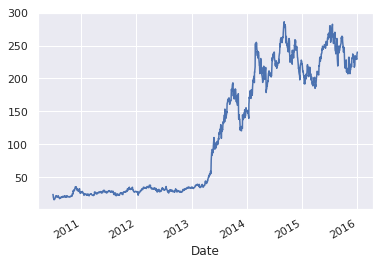

In [70]:
goog2.plot()

In [90]:
goog2.shape

(1388,)

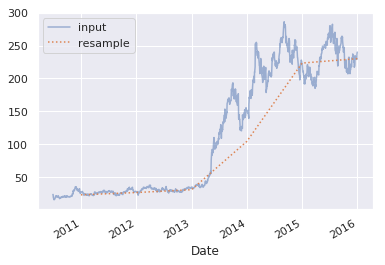

In [91]:
goog2.plot(alpha=0.5, style='-')
goog2.resample('BA').mean().plot(style=':')
#goog2.asfreq('BA', method='bfill').plot(style='--')
plt.legend(['input','resample','asfreq'],
          loc='upper left')

In [93]:
goog2['2010-12-31']

Date
2010-12-31    26.63
Name: Close, dtype: float64

In [95]:
goog2.resample('BA').mean()

Date
2010-12-31     23.341723
2011-12-30     26.804710
2012-12-31     31.168693
2013-12-31    104.401367
2014-12-31    223.329056
2015-12-31    230.042738
2016-12-30           NaN
Freq: BA-DEC, Name: Close, dtype: float64

In [102]:
goog2['2010'].mean()

23.341723076923078

In [97]:
index = pd.date_range('1/1/2000', periods=9, freq='T')

In [98]:
series = pd.Series(range(9), index=index)

In [99]:
series

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
2000-01-01 00:05:00    5
2000-01-01 00:06:00    6
2000-01-01 00:07:00    7
2000-01-01 00:08:00    8
Freq: T, dtype: int64

#### resample()

Realiza una agregación de las series en función de un periodo pasado por parámetro. En este caso, agrupa de 3 en 3 minutos y suma el valor

In [100]:
series.resample('3T').sum()

2000-01-01 00:00:00     3
2000-01-01 00:03:00    12
2000-01-01 00:06:00    21
Freq: 3T, dtype: int64

In [108]:
goog2.asfreq('D', method='ffill').plot()

TypeError: Empty 'DataFrame': no numeric data to plot

#### asfreq()

Calcula frecuencias en base a un período dado

In [110]:
goog2.asfreq?

In [111]:
index = pd.date_range('1/1/2000', periods=4, freq='T')

In [112]:
index

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:01:00',
               '2000-01-01 00:02:00', '2000-01-01 00:03:00'],
              dtype='datetime64[ns]', freq='T')

In [113]:
series = pd.Series([0.0, None, 2.0, 3.0], index=index)

In [114]:
series

2000-01-01 00:00:00    0.0
2000-01-01 00:01:00    NaN
2000-01-01 00:02:00    2.0
2000-01-01 00:03:00    3.0
Freq: T, dtype: float64

In [115]:
df = pd.DataFrame({'s':series})

In [116]:
df

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:01:00,NaN
2000-01-01 00:02:00,2.0
2000-01-01 00:03:00,3.0


In [117]:
df.asfreq(freq='30S')

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:00:30,NaN
2000-01-01 00:01:00,NaN
2000-01-01 00:01:30,NaN
2000-01-01 00:02:00,2.0
2000-01-01 00:02:30,NaN
2000-01-01 00:03:00,3.0


In [123]:
df.asfreq(freq='30S', fill_value=0)

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:00:30,0.0
2000-01-01 00:01:00,NaN
2000-01-01 00:01:30,0.0
2000-01-01 00:02:00,2.0
2000-01-01 00:02:30,0.0
2000-01-01 00:03:00,3.0
